In [1]:
# import os 
# import pandas as pd
# import bokeh
# from matplotlib import pyplot as plt
# import numpy as np
# #import bokeh
# #from holoviews import opts
# #import holoviews as hv
# #hv.extension('bokeh', logo=False)
# import seaborn as sns
# import plotly.express as px



 
# demultiplex_folder = Path(os.path.join(result_folder, experiment_folder, "demultiplex_60_reversed"))

# barcode_dicts = get_barcode_dict(demultiplex_folder)

In [12]:
import sys
sys.path.append("/home/emre/github_repo/MinION")
from minION.util.IO_processor import get_barcode_dict
from minION import analyser
from minION import consensus
import importlib
importlib.reload(analyser)
importlib.reload(consensus)
from uncertainties import ufloat 
from pathlib import Path

In [3]:
folder_path = Path("/home/emre/minION_results/MinION_RBC_0902723_sup/demultiplex/barcode03/barcode52")
template_fasta = Path("/home/emre/github_repo/MinION/minION/refseq/hetcpiii.fasta")
#consensus.get_consensus(folder_path, template_fasta)

In [10]:
d_path = "/home/emre/minION_results/MinION_RBC_0902723_sup/Demultiplex_cpp_70"
summary = analyser.read_summary_file(d_path)


In [39]:
import pandas as pd
ref_csv = pd.read_csv("/home/emre/minION_results/AminoAcids_Coupled_Max.csv")

In [16]:
summary =summary.groupby(["RBC","FBC"])["FBC"].value_counts().reset_index()

In [13]:
barcodes = get_barcode_dict(Path(d_path))
variant_df = analyser.get_variant_df(Path(d_path), template_fasta, barcodes, consensus_folder_name="consensus_2" ,sequences=True)

In [124]:
template = analyser.get_template_sequence(template_fasta) # Reference sequence
template_aa = analyser.translate_sequence([template])

consensus = analyser.get_consensus_sequence(path_file, True)
quality = analyser.mean_quality_score(consensus["Quality-Score"][0])
consensus_aa = analyser.translate_sequence(consensus["Sequence"])

In [129]:
aa_variants = analyser.call_variant(template_aa["Protein-Sequence"][0], consensus_aa["Protein-Sequence"][0], quality)


In [15]:
#Concat a column from ref_csv to variant_df
variant_df[variant_df["Plate"] == 3].head()

,Plate,Well,Position,Variant,Quality-Score,Sequence,count
192,3,A1,NaN,NaN,NaN,NaN,NaN
193,3,A2,NaN,NaN,NaN,NaN,NaN
194,3,A3,[13],[R->C],[31.333],MTPSDIPGYDYGCVEKSPITDLEFDLLKKTVMLGEKDVMYLKKARD...,14525.0
195,3,A4,[48],[L->M],[32.667],MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKARD...,15026.0
196,3,A5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
283,3,H8,[59],[W->R],[22.0],MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKARD...,6362.0
284,3,H9,[],[],[],MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKARD...,16413.0
285,3,H10,NaN,NaN,NaN,NaN,NaN
286,3,H11,"[36, 70]","[K->R, I->T]","[27.333, 23.0]",MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGERDVMYLKKARD...,12118.0


In [157]:
summary =summary.groupby(["RBC","FBC"])["FBC"].value_counts().reset_index()

In [161]:
summary[summary["RBC"] == "RB01"].head(20)

,RBC,FBC,count
0,RB01,NB01,239
1,RB01,NB02,16187
2,RB01,NB03,19024
3,RB01,NB04,14054
4,RB01,NB05,21472
5,RB01,NB06,21558
6,RB01,NB07,11111
7,RB01,NB08,162
8,RB01,NB09,380
9,RB01,NB10,93


In [5]:
## Test for demultiplexer

d_path = "/home/emre/minION_results/MinION_RBC_0902723_sup/Demultiplex_cpp_70"
summary = analyser.read_summary_file(d_path)


In [6]:
summary

,RBC,RBC_Score,FBC,FBC_Score
0,unclassified,34.6835,NaN,0.0000
1,RB02,100.0000,NB32,38.5072
2,RB01,100.0000,NB61,85.6901
3,RB02,100.0000,NB27,100.0000
4,RB03,100.0000,NB35,39.1194
...,...,...,...,...
5563198,unclassified,64.9789,NaN,0.0000
5563199,RB03,100.0000,NB41,95.8404
5563200,RB02,100.0000,NB08,87.5949
5563201,RB01,100.0000,NB87,100.0000


In [7]:
summary = summary.groupby(["RBC","FBC"])["FBC"].value_counts().reset_index()

In [9]:
summary.tail(20)

,RBC,FBC,count
268,RB03,NB77,20593
269,RB03,NB78,15238
270,RB03,NB79,9792
271,RB03,NB80,4775
272,RB03,NB81,10483
273,RB03,NB82,12408
274,RB03,NB83,17835
275,RB03,NB84,6071
276,RB03,NB85,1597
277,RB03,NB86,6888


In [181]:
summary["RBC"].value_counts().reset_index()

,RBC,count
0,unclassified,11733
1,RB03,9348
2,RB01,9002
3,RB02,9000


In [8]:
count_df = summary.groupby(["RBC","FBC"])["FBC"].value_counts().reset_index()

In [11]:
count_df[count_df["RBC"] == "RB03"].head(20)

,RBC,FBC,count
192,RB03,NB01,450
193,RB03,NB02,14406
194,RB03,NB03,14525
195,RB03,NB04,15026
196,RB03,NB05,13256
197,RB03,NB06,17247
198,RB03,NB07,14445
199,RB03,NB08,17862
200,RB03,NB09,17885
201,RB03,NB10,11464


In [43]:
variant_df["Truth"] = ref_csv["VariantCombo"]

In [38]:
variant_df[variant_df["Plate"] == 2].head(20)

,Plate,Well,Position,Variant,Quality-Score,Sequence,count,Truth
96,2,A1,NaN,NaN,NaN,NaN,NaN,#DEAD#
97,2,A2,NaN,NaN,NaN,NaN,NaN,#PARENT#
98,2,A3,"[9, 32]","[Y->C, M->L]","[31.667, 29.667]",MTPSDIPGCDYGRVEKSPITDLEFDLLKKTVLLGEKDVMYLKKARD...,20789.0,Y9C_M32L
99,2,A4,[10],[D->E],[21.333],MTPSDIPGYEYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKARD...,8304.0,D10E
100,2,A5,NaN,NaN,NaN,NaN,NaN,#PARENT#
101,2,A6,NaN,NaN,NaN,NaN,NaN,Y9H_E23G
102,2,A7,NaN,NaN,NaN,NaN,NaN,D10D
103,2,A8,NaN,NaN,NaN,NaN,NaN,D53D
104,2,A9,NaN,NaN,NaN,NaN,NaN,D50G_G61S
105,2,A10,[26],[L->F],[32.333],MTPSDIPGYDYGRVEKSPITDLEFDFLKKTVMLGEKDVMYLKKARD...,11497.0,L26F


In [4]:
import pandas as pd
new_var_df = pd.read_csv("/home/emre/minION_results/MinION_RBC_0902723_sup/demultiplex_cpp_70_variant_df.csv")

In [49]:
new_var_df["Acc (1 or 0)"].sum()/288

0.7771990740729167

In [5]:
acc = new_var_df.groupby("Plate")["Acc (1 or 0)"].sum()/96

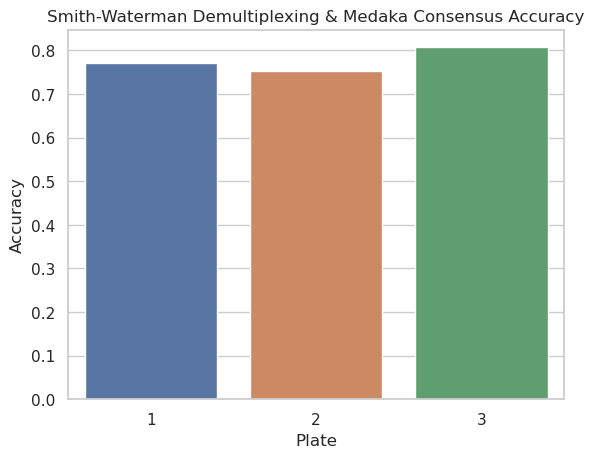

In [11]:
# Barplot for accuracy
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=acc.index, y=acc.values)
ax.set(xlabel='Plate', ylabel='Accuracy')
plt.title("Smith-Waterman Demultiplexing & Medaka Consensus Accuracy")
plt.savefig("/home/emre/minION_results/MinION_RBC_0902723_sup/accuracy.png")
plt.show()
